# Section 4.6 — Generalized linear models

This notebook contains the code examples from [Section 4.6 Generalized linear models]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Figures setup
import matplotlib.pyplot as plt
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (4, 2)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/generalized"

<Figure size 640x480 with 0 Axes>

## Definitions

In [3]:
def expit(x):
    p = np.exp(x) / (1 + np.exp(x))
    return p

def logit(p):
    x = np.log(p / (1-p))
    return x

In [4]:
from scipy.special import logit
from scipy.special import expit

In [5]:
expit(logit(0.3))

0.30000000000000004

In [6]:
logit(expit(5))

5.000000000000019

### Odds

### Log-odds

## Logistic regression

TODO FORMULA

### Data generation for logistic regression

TODO: move to gen_interns.ipynb

In [7]:
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.special import expit

np.random.seed(42)

n = 100
hours = norm(40, 5).rvs(n)
prob_hired = expit(-80 + 2*hours)
hired = bernoulli(prob_hired).rvs(n)

interns = pd.DataFrame({"hours":hours.round(1),
                        "hired":hired})

interns.to_csv("../datasets/interns.csv", index=False)

## Logistic regression

### Example 1: hiring student interns

In [8]:
interns = pd.read_csv("../datasets/interns.csv")
interns.head(3)

,hours,hired
0,42.5,1
1,39.3,0
2,43.2,1


In [9]:
import statsmodels.formula.api as smf

lr1 = smf.logit("hired ~ 1 + hours", data=interns).fit()
print(lr1.params)

Optimization terminated successfully.
         Current function value: 0.138101
         Iterations 10
Intercept   -78.693205
hours         1.981458
dtype: float64


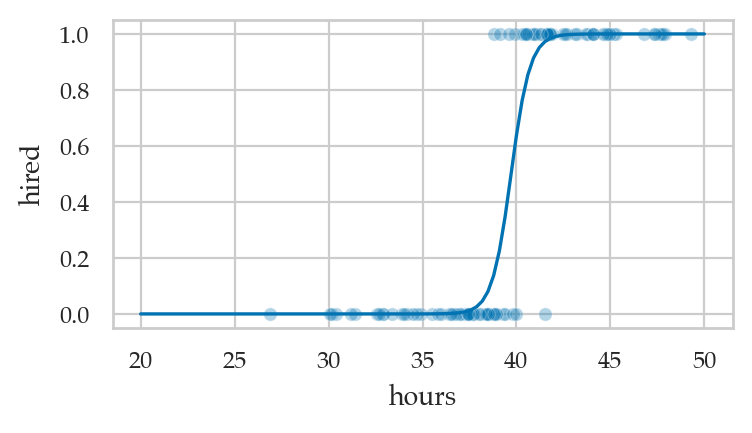

In [10]:
hours = np.linspace(20, 50, 100)
hired_preds = lr1.predict({"hours": hours})
ax = sns.scatterplot(data=interns, x="hours", y="hired", alpha=0.3)
sns.lineplot(x=hours, y=hired_preds, ax=ax);

In [11]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.8005
Time:                        09:29:58   Log-Likelihood:                -13.810
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.385e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.6932     19.851     -3.964      0.000    -117.600     -39.787
hours          1.9815      0.500      3.959      0.000       1.001       2.962
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Prediction

In [12]:
prob_hired = lr1.predict({"hours":41})
prob_hired[0]

0.9273422944341034

## Poisson regression

### Data generation for Poisson regression

TODO: mv to gen_hdisks.ipynb

In [13]:
from scipy.stats import uniform
from scipy.stats import poisson

np.random.seed(47)

n = 100
age = uniform(0,15).rvs(n)
lam = np.exp(1 + 0.2*age)
failures = poisson(lam).rvs(n)

hdisks = pd.DataFrame({"age":age.round(1),
                       "failures":failures})

hdisks.to_csv("../datasets/hdisks.csv", index=False)

### Example 2: hard disk failures over time

In [14]:
hdisks = pd.read_csv("../datasets/hdisks.csv")
hdisks.head(3)

,age,failures
0,1.7,3
1,14.6,46
2,10.9,23


In [15]:
import statsmodels.formula.api as smf

pr2 = smf.poisson("failures ~ 1 + age", data=hdisks).fit()
pr2.params

Optimization terminated successfully.
         Current function value: 2.693129
         Iterations 6


Intercept    1.075999
age          0.193828
dtype: float64

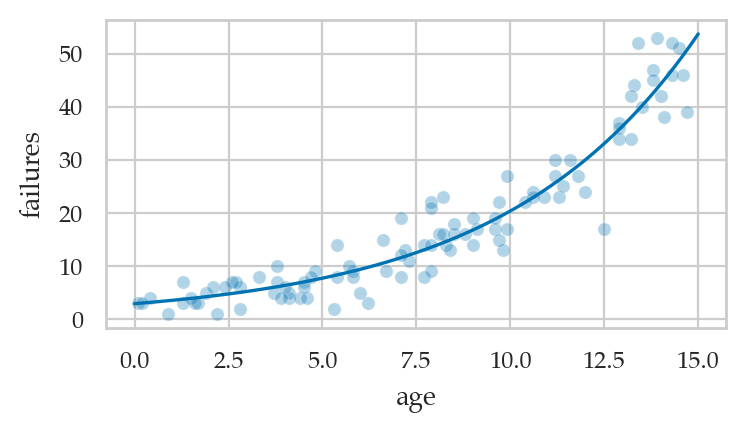

In [16]:
ages = np.linspace(0, 15, 100)
failures_preds = pr2.predict({"age":ages})
ax = sns.scatterplot(data=hdisks, x="age", y="failures", alpha=0.3)
sns.lineplot(x=ages, y=failures_preds, ax=ax);

In [17]:
pr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               failures   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.6412
Time:                        09:29:58   Log-Likelihood:                -269.31
converged:                       True   LL-Null:                       -750.68
Covariance Type:            nonrobust   LLR p-value:                2.271e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0760      0.076     14.114      0.000       0.927       1.225
age            0.1938      0.007     28.603      0.000       0.181       0.207
==============================================================================
"""

## Explanations

### Generalized linear families

In [18]:
import statsmodels.api as sm

Bin = sm.families.Binomial()
Pois = sm.families.Poisson()

In [19]:
#######################################################
formula = "hired ~ 1 + hours"
glm1 = smf.glm(formula, data=interns, family=Bin).fit()
glm1.params
# glm1.summary()

Intercept   -78.693205
hours         1.981458
dtype: float64

In [20]:
#######################################################
formula = "failures ~ 1 + age"
glm2 = smf.glm(formula, data=hdisks, family=Pois).fit()
glm2.params
# glm2.summary()

Intercept    1.075999
age          0.193828
dtype: float64

## Discussion

### Model diagnostics

In [21]:
# Dispersion from GLM attributes
# glm2.pearson_chi2 / glm2.df_resid

In [22]:
# Calculate Pearson chi-squared statistic
observed = hdisks['failures']
predicted = pr2.predict()
pearson_residuals = (observed - predicted) / np.sqrt(predicted)
pearson_chi2 = np.sum(pearson_residuals**2)
df_resid = pr2.df_resid
dispersion = pearson_chi2 / df_resid
print(f'Dispersion: {dispersion}')
# If dispersion > 1, consider Negative Binomial regression

Dispersion: 0.9869289289681199


## Exercises

### Exercise: students pass or fail

In [23]:
students = pd.read_csv('../datasets/students.csv')
students["passing"] = (students["score"] > 70).astype(int)
# students.head()

Optimization terminated successfully.
         Current function value: 0.276583
         Iterations 8
Intercept   -16.257302
effort        2.047882
dtype: float64


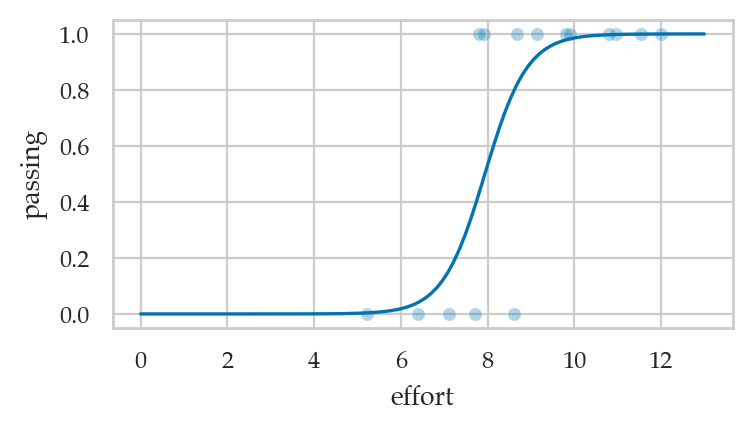

In [24]:
lmpass = smf.logit("passing ~ 1 + effort", data=students).fit()
print(lmpass.params)

efforts = np.linspace(0, 13, 100)
passing_preds = lmpass.predict({"effort": efforts})
ax = sns.scatterplot(data=students, x="effort", y="passing", alpha=0.3)
sns.lineplot(x=efforts, y=passing_preds, ax=ax);

In [25]:
lmpass.predict({"effort":8})

0    0.531396
dtype: float64

In [26]:
intercept, b_effort = lmpass.params
expit(intercept + b_effort*8)

0.5313963881248303

### Exercise: titanic survival data

cf. [Titanic_Logistic_Regression.ipynb](./explorations/Titanic_Logistic_Regression.ipynb)

In [27]:
titanic_raw = pd.read_csv('../datasets/exercises/titanic.csv')
titanic = titanic_raw[['Survived', 'Age', 'Sex', 'Pclass']]
titanic = titanic.dropna()
titanic.head()

,Survived,Age,Sex,Pclass
0,0,22.0,male,3
1,1,38.0,female,1
2,1,26.0,female,3
3,1,35.0,female,1
4,0,35.0,male,3


In [28]:
formula = "Survived ~ Age + C(Sex) + C(Pclass)"
lrtitanic = smf.logit(formula, data=titanic).fit()
lrtitanic.params

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


Intercept         3.777013
C(Sex)[T.male]   -2.522781
C(Pclass)[T.2]   -1.309799
C(Pclass)[T.3]   -2.580625
Age              -0.036985
dtype: float64

In [29]:
# Cross check with sklearn
from sklearn.linear_model import LogisticRegression
df = pd.get_dummies(titanic, columns=['Sex', 'Pclass'], drop_first=True)
X, y = df.drop('Survived', axis=1), df['Survived']
sktitanic = LogisticRegression(penalty=None)
sktitanic.fit(X, y)
sktitanic.intercept_, sktitanic.coef_

(array([3.77702703]),
 array([[-0.03698571, -2.52276365, -1.30981349, -2.58063585]]))

### Exercise: student admissions dataset

In [30]:
# data = whether students got admitted (admit=1) or not (admit=0) based on their gre and gpa scores, and the rank of their instutution
# raw_data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
binary = pd.read_csv('../datasets/exercises/binary.csv')
binary.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [31]:
lrbinary = smf.logit('admit ~ gre + gpa + C(rank)', data=binary).fit()
lrbinary.params

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

The above model uses the rank=1 as the reference category an the log odds reported are with respect to this catrgory

$$
   \log p(accept|rank=1) / \log p(accept|rank=2) = \texttt{C(rank)rank[T.2]} = -0.675443
$$

etc. for others
rank[T.3] 	-1.340204
rank[T.4] 	-1.551464


See [LogisticRegressionChangeOfReferenceCategoricalValue.ipynb](./explorations/LogisticRegressionChangeOfReferenceCategoricalValue.ipynb) for exercise recodign relative to different refrence level.


In [32]:
# Cross check with sklearn
from sklearn.linear_model import LogisticRegression
df = pd.get_dummies(binary, columns=['rank'], drop_first=True)
X, y = df.drop("admit", axis=1), df["admit"]
lr = LogisticRegression(solver="lbfgs", penalty=None, max_iter=1000)
lr.fit(X, y)
lr.intercept_,  lr.coef_

(array([-3.99001587]),
 array([[ 0.00226442,  0.80404719, -0.67543916, -1.3401993 , -1.5514551 ]]))

### Exercise: LA high schools (NOT A VERY GOOD FIT FOR POISSON MODEL)

Dataset info: 
http://www.philender.com/courses/intro/assign/data.html

This dataset consists of data from computer exercises collected from two high school in the Los Angeles area.


http://www.philender.com/courses/intro/code.html



In [33]:
lahigh_raw = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/notes/lahigh.dta")
lahigh = lahigh_raw.convert_dtypes()

lahigh["gender"] = lahigh["gender"].astype(object).replace({1:"F", 2:"M"})
lahigh["ethnic"] = lahigh["ethnic"].astype(object).replace({
    1:"Native American",
    2:"Asian",
    3:"African-American",
    4:"Hispanic",
    5:"White",
    6:"Filipino",
    7:"Pacific Islander"})
lahigh["school"] = lahigh["school"].astype(object).replace({1:"Alpha", 2:"Beta"})
lahigh

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,M,Hispanic,Alpha,63,36,56.988831,42.450859,2,4
1,1002,M,Hispanic,Alpha,27,44,37.094158,46.820587,2,4
2,1003,F,Hispanic,Alpha,20,38,32.275455,43.566574,2,2
3,1004,F,Hispanic,Alpha,16,38,29.056717,43.566574,2,3
4,1005,F,Hispanic,Alpha,2,14,6.748048,27.248474,3,3
...,...,...,...,...,...,...,...,...,...,...
311,2153,M,Hispanic,Beta,26,46,36.451145,47.884865,2,1
312,2154,F,White,Beta,79,81,66.983231,68.488495,2,3
313,2155,F,Hispanic,Beta,59,56,54.792099,53.179413,0,0
314,2156,F,White,Beta,90,82,76.989479,69.277588,0,0


In [34]:
lahigh

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,M,Hispanic,Alpha,63,36,56.988831,42.450859,2,4
1,1002,M,Hispanic,Alpha,27,44,37.094158,46.820587,2,4
2,1003,F,Hispanic,Alpha,20,38,32.275455,43.566574,2,2
3,1004,F,Hispanic,Alpha,16,38,29.056717,43.566574,2,3
4,1005,F,Hispanic,Alpha,2,14,6.748048,27.248474,3,3
...,...,...,...,...,...,...,...,...,...,...
311,2153,M,Hispanic,Beta,26,46,36.451145,47.884865,2,1
312,2154,F,White,Beta,79,81,66.983231,68.488495,2,3
313,2155,F,Hispanic,Beta,59,56,54.792099,53.179413,0,0
314,2156,F,White,Beta,90,82,76.989479,69.277588,0,0


In [35]:
formula = "daysabs ~ 1 + mathnce + langnce + C(gender)"
prlahigh = smf.poisson(formula, data=lahigh).fit()
prlahigh.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept         2.687666
C(gender)[T.M]   -0.400921
mathnce          -0.003523
langnce          -0.012152
dtype: float64

In [36]:
# IRR
np.exp(prlahigh.params[1:])

C(gender)[T.M]    0.669703
mathnce           0.996483
langnce           0.987921
dtype: float64

In [37]:
# CI for IRR F 
np.exp(prlahigh.conf_int().loc["C(gender)[T.M]"])

0    0.609079
1    0.736361
Name: C(gender)[T.M], dtype: float64

In [38]:
# prlahigh.summary()
# prlahigh.aic, prlahigh.bic

In [39]:
prlahigh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                daysabs   No. Observations:                  316
Model:                        Poisson   Df Residuals:                      312
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                 0.05358
Time:                        09:30:00   Log-Likelihood:                -1548.0
converged:                       True   LL-Null:                       -1635.6
Covariance Type:            nonrobust   LLR p-value:                 9.246e-38
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6877      0.073     36.994      0.000       2.545       2.830
C(gender)[T.M]    -0.4009      0.048     -8.281      0.000      -0.496      -0.306
mathnce           -0.0035      0.002     -1.934      0.053      -0.007    4.66e-05
langnce           -0.0122      0.002     -6.623      0.000      -0.016      -0.009
==================================================================================
"""

#### Diagnostics 

via https://www.statsmodels.org/dev/examples/notebooks/generated/postestimation_poisson.html

In [40]:
prdiag = prlahigh.get_diagnostic()
# Plot observed versus predicted frequencies for entire sample
# prdiag.plot_probs();

# Other:
# ['plot_probs',
#  'probs_predicted',
#  'results',
#  'test_chisquare_prob',
#  'test_dispersion',
#  'test_poisson_zeroinflation',
#  'y_max']

In [41]:
# Code to get exactly the same numbers as in
# https://stats.oarc.ucla.edu/stata/output/poisson-regression/  
formula2 = "daysabs ~ 1 + mathnce + langnce + C(gender, Treatment(1))"
prlahigh2 = smf.poisson(formula2, data=lahigh).fit()
prlahigh2.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept                       2.286745
C(gender, Treatment(1))[T.F]    0.400921
mathnce                        -0.003523
langnce                        -0.012152
dtype: float64

### Exercise: asthma attacks

data https://github.com/drkamarul/multivar_data_analysis/blob/main/data/asthma.csv

In [42]:
asthma = pd.read_csv("../datasets/exercises/asthma.csv")
asthma

,gender,res_inf,ghq12,attack
0,female,yes,21,6
1,male,no,17,4
2,male,yes,30,8
3,female,yes,22,5
4,male,yes,27,2
...,...,...,...,...
115,male,yes,0,2
116,female,yes,31,2
117,female,yes,18,2
118,female,yes,21,3


cf. https://bookdown.org/drki_musa/dataanalysis/poisson-regression.html#multivariable-analysis-1

### Exercise: ship accidents

https://rdrr.io/cran/AER/man/ShipAccidents.html

https://pages.stern.nyu.edu/~wgreene/Text/tables/tablelist5.htm

https://pages.stern.nyu.edu/~wgreene/Text/tables/TableF21-3.txt

## Links

# CUT MATERIAL 